In [24]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score

# Load data (replace with your file path)
data = pd.read_csv('creditcard.csv')
# Check the first few rows of the data
print(data.head())

# Prepare features and labels (assumed 'Class' column is the label for fraud detection)
X = data.drop('Class', axis=1)
y = data['Class']


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [30]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

iforest = IsolationForest(n_estimators=100, contamination=0.1)
y_pred_iforest = iforest.fit_predict(X_test)
y_pred_iforest = [1 if pred == -1 else 0 for pred in y_pred_iforest]  # Convert to binary (fraud = 1)
# --- Local Outlier Factor (LOF) ---
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_lof = lof.fit_predict(X_test)
y_pred_lof = [1 if pred == -1 else 0 for pred in y_pred_lof]  # Convert to binary (fraud = 1)
model = Sequential()
# ---- 3. Deep Learning Model (Sequential) ----
# Build a Sequential model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input shape here
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Deep Learning Model Accuracy: {accuracy*100:.2f}%")

# Get the model's predictions
y_pred_dl = (model.predict(X_test) > 0.5).astype("int32")
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)
# Print evaluation metrics for Deep Learning Model
print("Deep Learning Classification Report:")
print(classification_report(y_test, y_pred_dl))
print("Deep Learning Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dl))
print("Deep Learning ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_dl))



Epoch 1/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9955 - loss: 0.0219 - val_accuracy: 0.9992 - val_loss: 0.0042
Epoch 2/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 4s 994us/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9988 - val_loss: 0.0052
Epoch 3/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 3s 911us/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9992 - val_loss: 0.0046
Epoch 4/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 3s 799us/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9988 - val_loss: 0.0078
Epoch 5/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 3s 799us/step - accuracy: 0.9994 - loss: 0.0021 - val_accuracy: 0.9987 - val_loss: 0.0082
Epoch 6/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 3s 943us/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9988 - val_loss: 0.0117
Epoch 7/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 5s 775us/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9985 - val_loss: 0.0077
Epoch 8/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 3s 892us/step - accuracy: 0.9995 - l

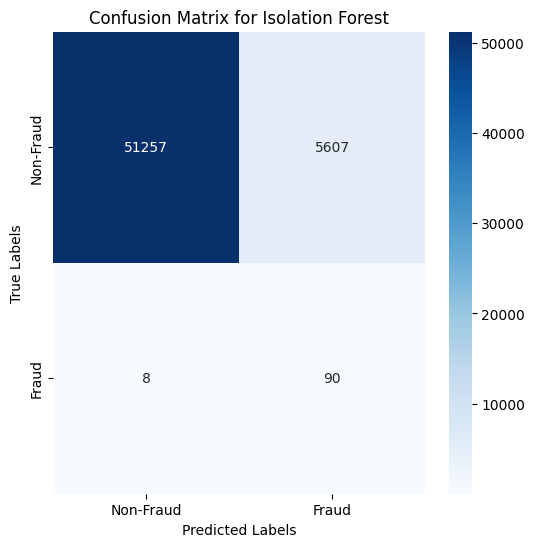

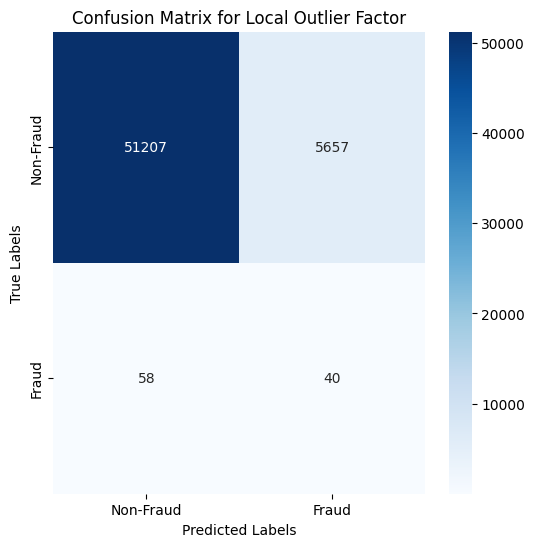

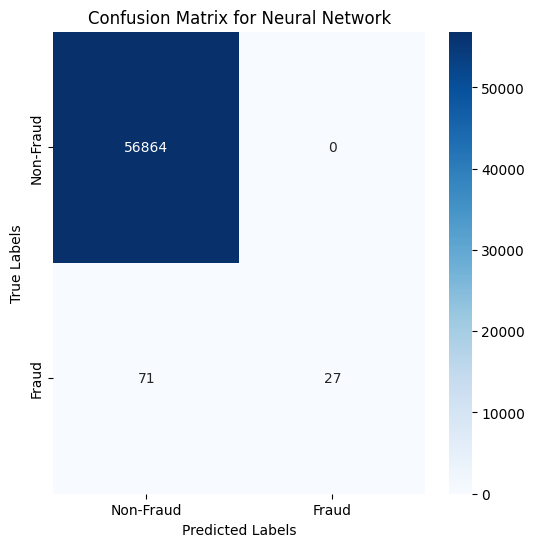

In [21]:
# --- Plot Confusion Matrices ---
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(6,6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
# Plot confusion matrices for each model
plot_confusion_matrix(confusion_matrix(y_test, y_pred_iforest), 'Isolation Forest')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_lof), 'Local Outlier Factor')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_nn), 'Neural Network')

In [14]:
# --- Evaluation ---
print("Isolation Forest Classification Report:")
print(classification_report(y_test, y_pred_iforest))
print("Local Outlier Factor Classification Report:")
print(classification_report(y_test, y_pred_lof))
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))


Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.92      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.90      0.95     56962

Local Outlier Factor Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.01      0.41      0.01        98

    accuracy                           0.90     56962
   macro avg       0.50      0.65      0.48     56962
weighted avg       1.00      0.90      0.95     56962

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.28      0.43        98

    accuracy                           1.00     56962
   mac

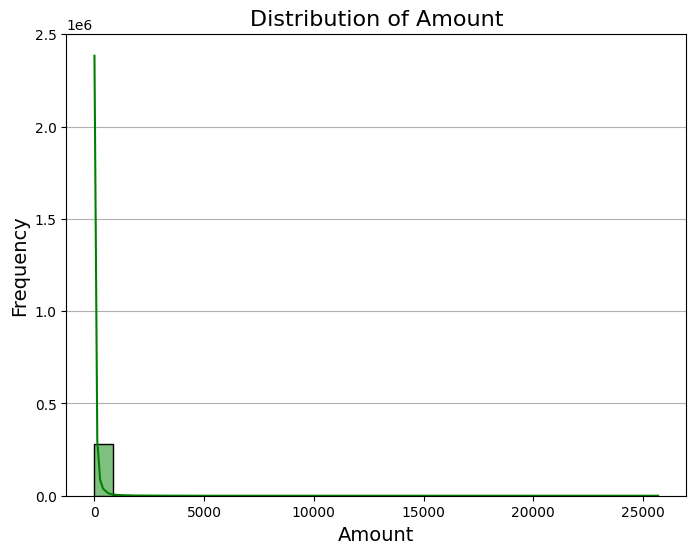

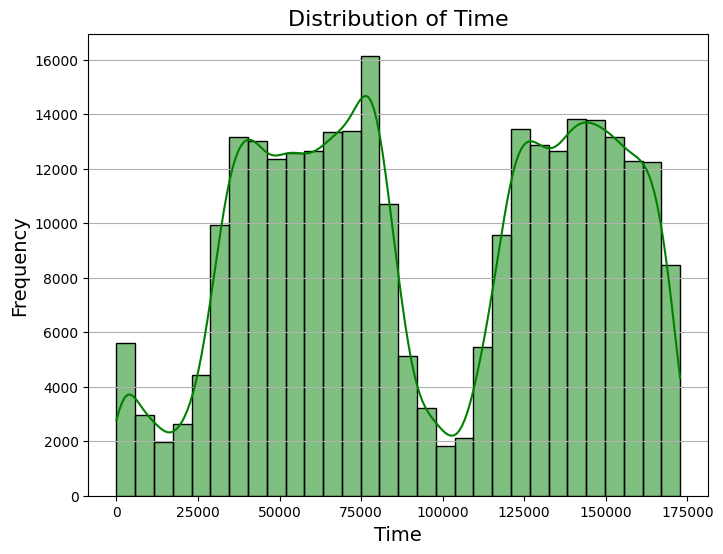

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# Load the dataset (ensure the path is correct)
data = pd.read_csv('creditcard.csv')  # Replace 'creditcard.csv' with the correct file path
# Example: Plot histograms for multiple features
features_to_plot = ['Amount', 'Time']  # Replace with desired feature names
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], bins=30, kde=True, color='green')
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y')
    plt.show()





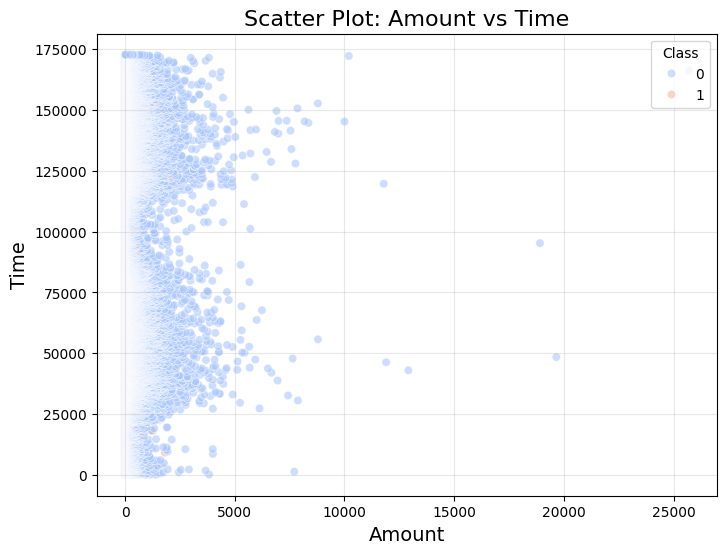

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for two features
feature_x = 'Amount'  # Replace with the desired column name (e.g., Amount)
feature_y = 'Time'    # Replace with the desired column name (e.g., Time)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x=feature_x, y=feature_y, hue='Class', palette='coolwarm', alpha=0.6)
plt.title(f'Scatter Plot: {feature_x} vs {feature_y}', fontsize=16)
plt.xlabel(feature_x, fontsize=14)
plt.ylabel(feature_y, fontsize=14)
plt.legend(title='Class', loc='upper right', fontsize=10)
plt.grid(alpha=0.3)
plt.show()


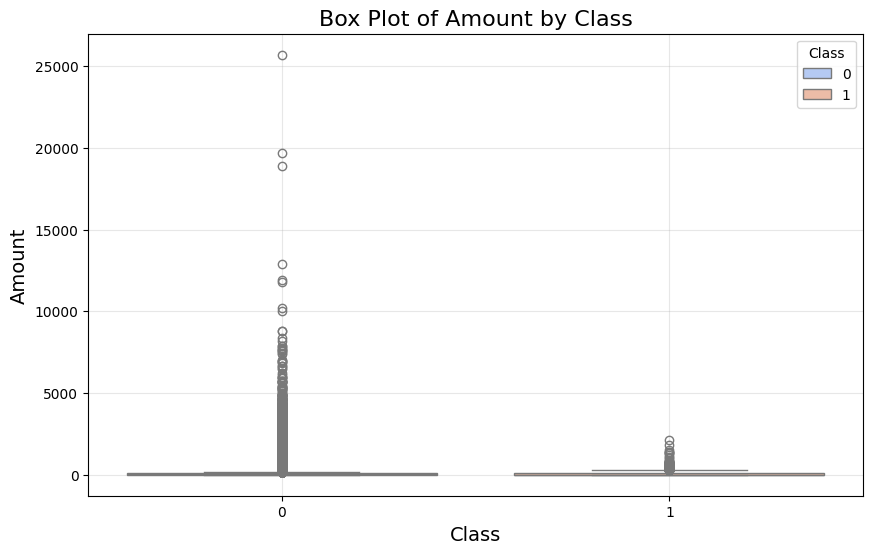

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature to visualize
feature_to_plot = 'Amount'  # Replace with the desired column name
hue_feature = 'Class'       # Use 'Class' to differentiate fraud vs. non-fraud

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x=hue_feature, y=feature_to_plot, hue=hue_feature, palette='coolwarm', dodge=False)
plt.title(f'Box Plot of {feature_to_plot} by {hue_feature}', fontsize=16)
plt.xlabel(hue_feature, fontsize=14)
plt.ylabel(feature_to_plot, fontsize=14)
plt.grid(alpha=0.3)
plt.legend(title=hue_feature)
plt.show()


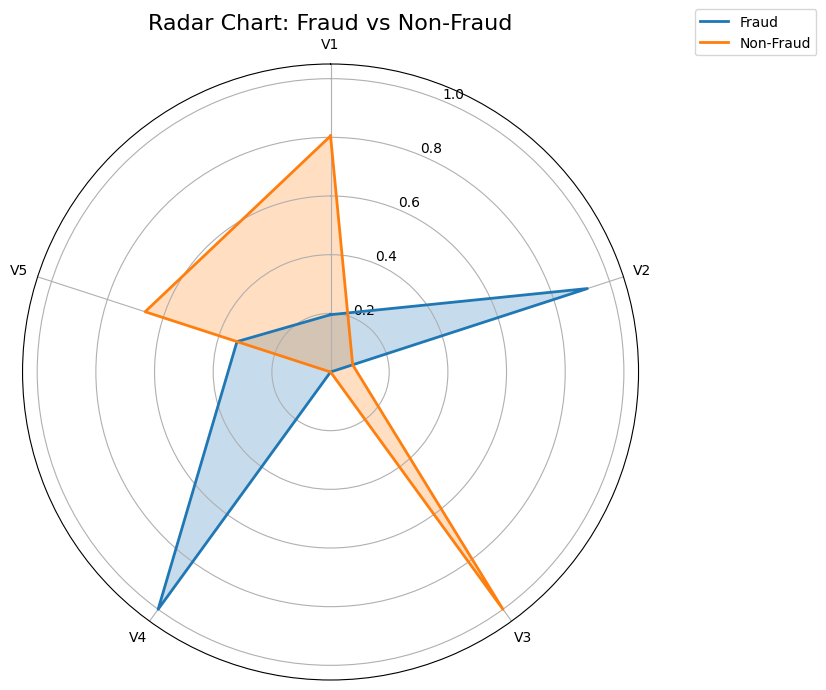

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select a subset of the dataset for radar chart visualization
# Choose numerical features and take an average for fraud (Class=1) and non-fraud (Class=0)
features = ['V1', 'V2', 'V3', 'V4', 'V5']  # Replace with desired numeric features
data_fraud = data[data['Class'] == 1][features].mean()
data_non_fraud = data[data['Class'] == 0][features].mean()

# Combine data into a single DataFrame for plotting
radar_data = pd.DataFrame({'Fraud': data_fraud, 'Non-Fraud': data_non_fraud})

# Normalize the data (optional, to bring values to a similar scale)
radar_data = (radar_data - radar_data.min()) / (radar_data.max() - radar_data.min())

# Prepare data for radar chart
categories = list(radar_data.index)
num_vars = len(categories)

# Create angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# Radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot for Fraud
ax.plot(angles, radar_data['Fraud'].tolist() + radar_data['Fraud'].tolist()[:1], label='Fraud', linewidth=2)
ax.fill(angles, radar_data['Fraud'].tolist() + radar_data['Fraud'].tolist()[:1], alpha=0.25)

# Plot for Non-Fraud
ax.plot(angles, radar_data['Non-Fraud'].tolist() + radar_data['Non-Fraud'].tolist()[:1], label='Non-Fraud', linewidth=2)
ax.fill(angles, radar_data['Non-Fraud'].tolist() + radar_data['Non-Fraud'].tolist()[:1], alpha=0.25)

# Add labels and legend
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Radar Chart: Fraud vs Non-Fraud', size=16)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()
